In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
df = pd.read_csv('StatewiseTestingDetails.csv')
pd.set_option('display.max_columns', None)
df.head(20)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,NaN,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,NaN,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,NaN,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,NaN,33.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_positive = df.groupby(df['Date'].dt.to_period('M'))['Positive'].mean()
monthly_positive

Date
2020-04       616.079316
2020-05      3044.572917
2020-06     10502.427711
2020-07     30515.329257
2020-08     75554.241860
2020-09    222237.739130
2020-10    243111.751295
2020-11    145604.152778
2020-12    180514.879195
2021-01    229988.845588
2021-02     59849.323810
2021-03     58751.235294
2021-04     68255.227273
2021-05    117749.580645
2021-06    132073.545455
2021-07    218697.800000
2021-08     79560.700000
Freq: M, Name: Positive, dtype: float64

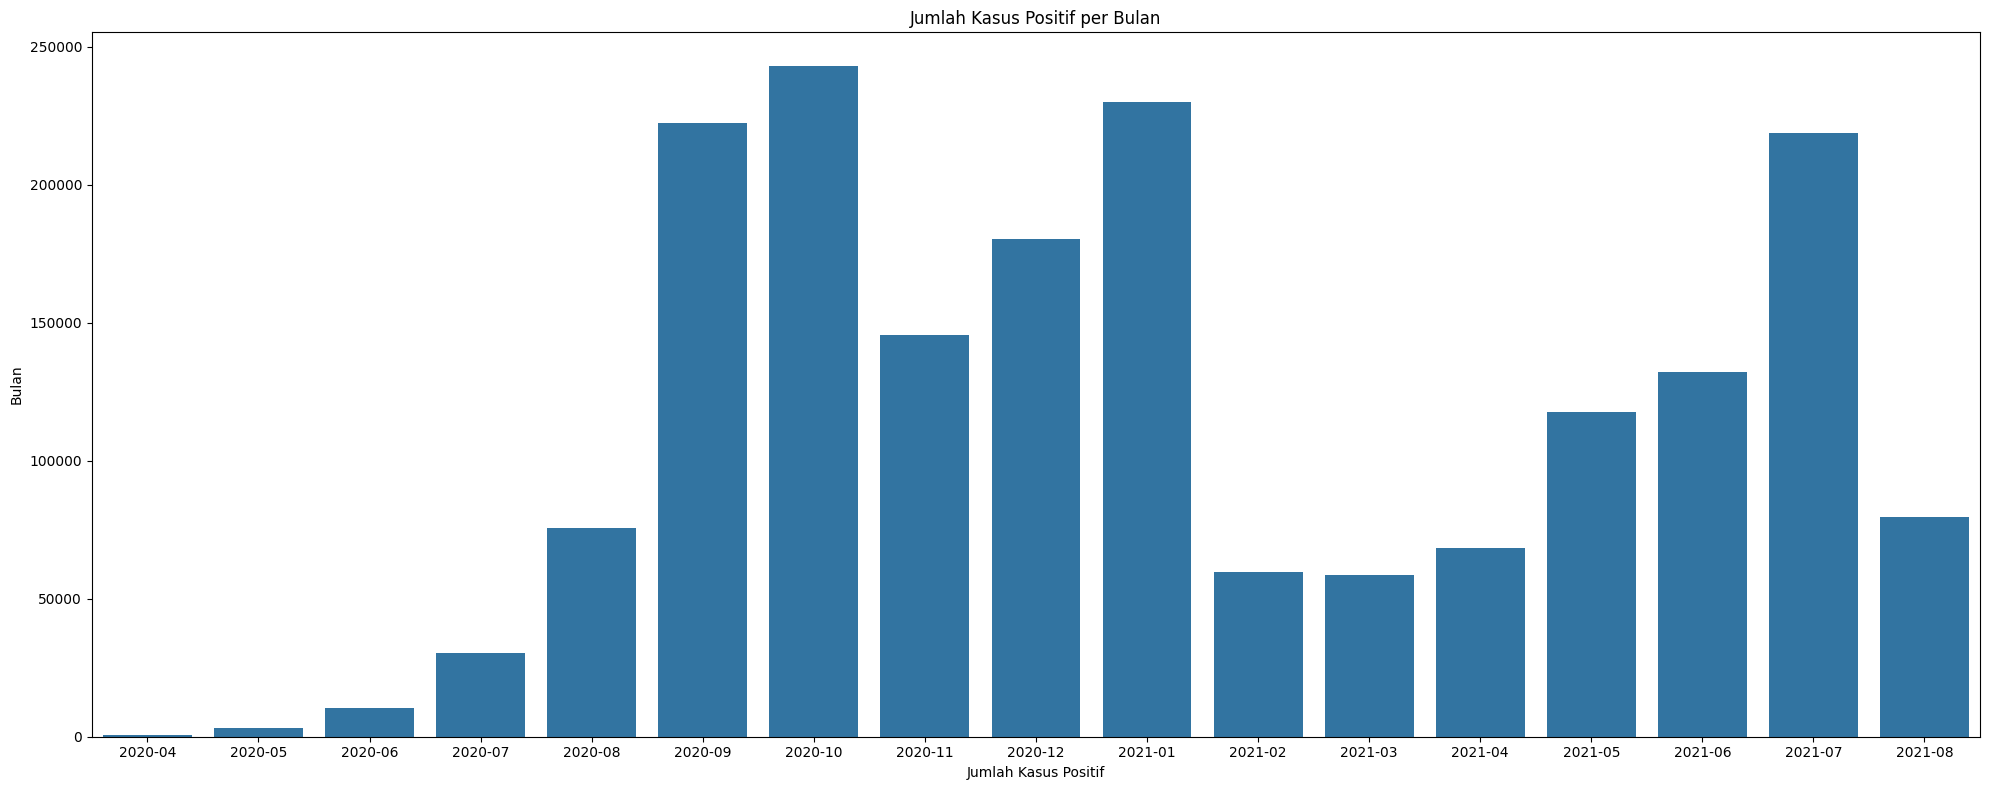

In [6]:
plt.figure(figsize=(20, 8))
sbn.barplot(x=monthly_positive.index.astype(str), y=monthly_positive.values)

plt.title('Jumlah Kasus Positif per Bulan')
plt.xlabel('Jumlah Kasus Positif')
plt.ylabel('Bulan')
plt.tight_layout()

plt.show()


In [7]:
monthly_positive = df.groupby(df['Date'].dt.to_period('M'))['Positive'].mean()

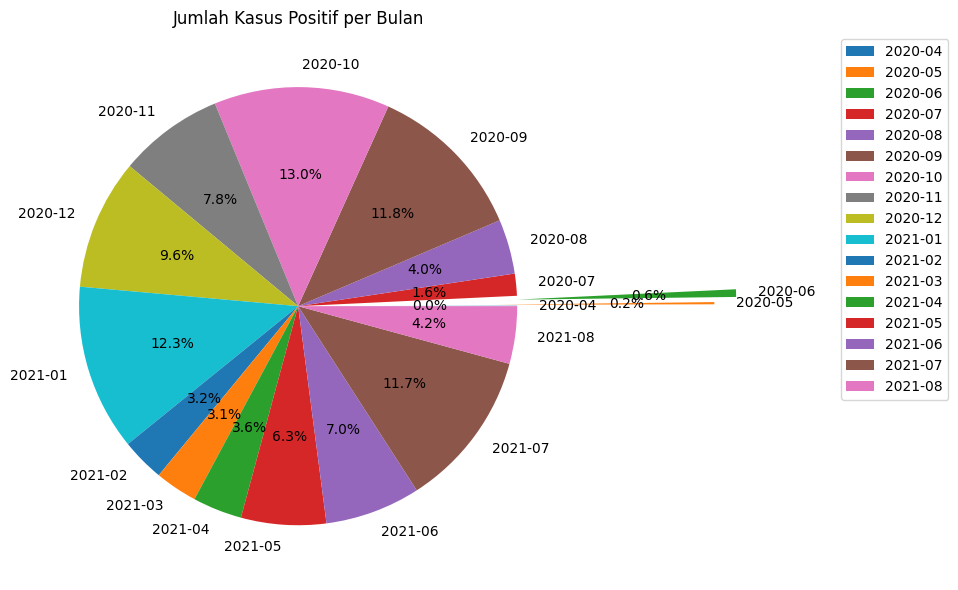

In [52]:
explode = [0, 0.9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
monthly_positive.plot.pie(autopct='%1.1f%%', figsize=(10,6), explode = explode, legend=True)

plt.title('Jumlah Kasus Positif per Bulan')
plt.ylabel('')  
plt.tight_layout()
plt.legend(title="Date")
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1))

plt.show()

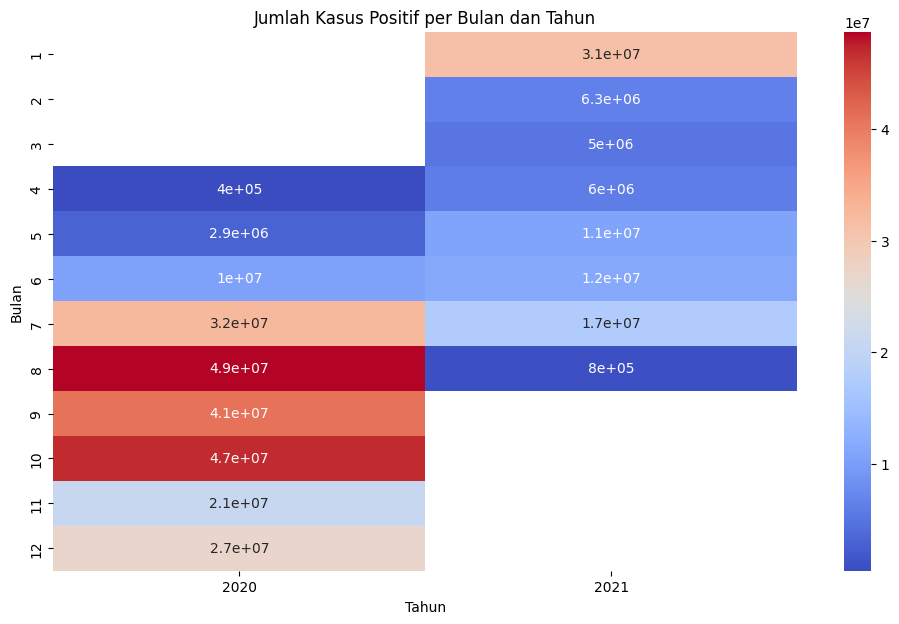

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

heatmap_data = df.groupby(['Year', 'Month'])['Positive'].sum().reset_index()

heatmap_data = heatmap_data.pivot(index='Month', columns='Year', values='Positive')

plt.figure(figsize=(12, 7))
sbn.heatmap(heatmap_data,cmap='coolwarm', annot=True)

plt.title('Jumlah Kasus Positif per Bulan dan Tahun')
plt.ylabel('Bulan')
plt.xlabel('Tahun')

plt.show()


In [48]:
state_positive = df.groupby(df['State'])['Positive'].mean().reset_index()
state_positive

,State,Positive
0,Andaman and Nicobar Islands,4101.374419
1,Andhra Pradesh,31376.097561
2,Arunachal Pradesh,441.767241
3,Assam,18122.728070
4,Bihar,14756.706349
5,Chandigarh,466.102362
6,Chhattisgarh,3713.150794
7,Dadra and Nagar Haveli and Daman and Diu,1119.271523
8,Delhi,55676.203252
9,Goa,2129.448000


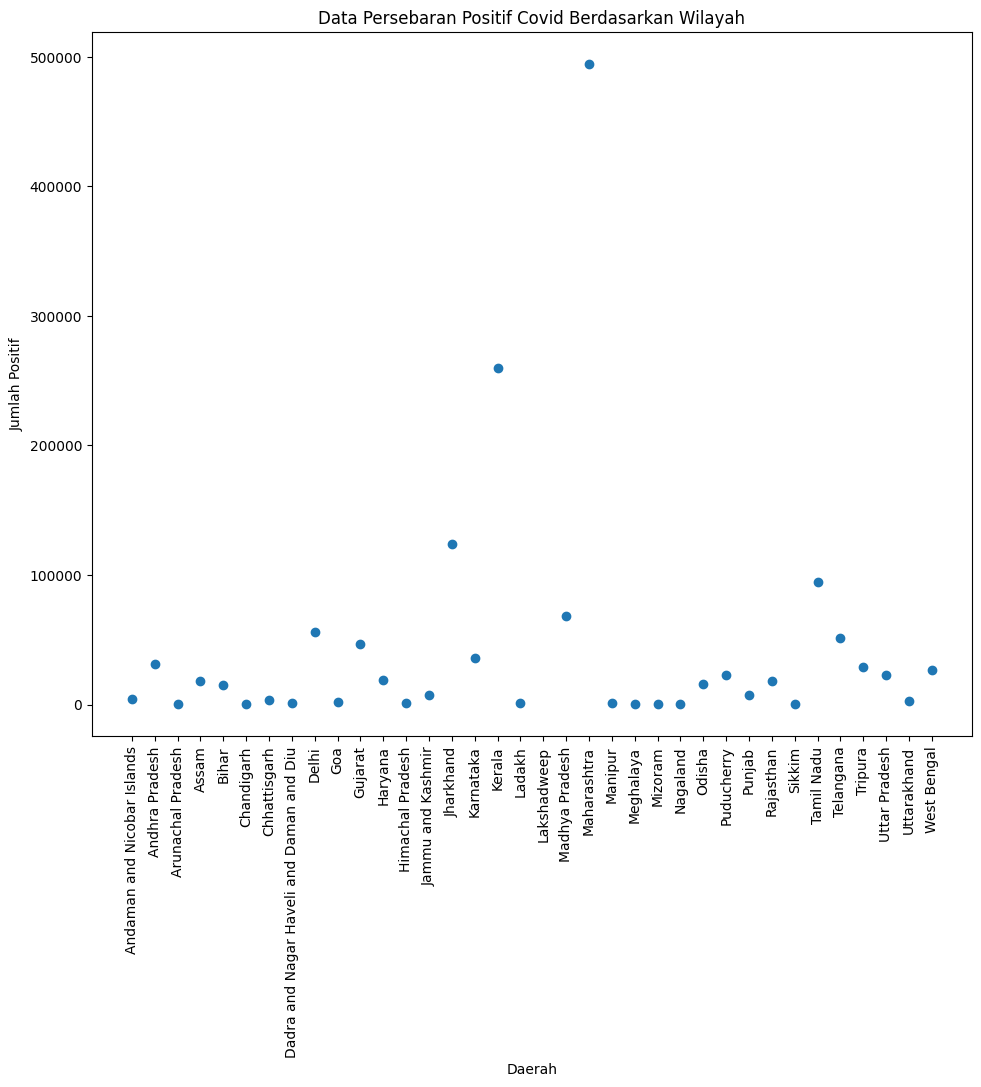

In [60]:
plt.figure(figsize=(10, 8))
plt.scatter(state_positive.State, state_positive.Positive)
plt.title('Data Persebaran Positif Covid Berdasarkan Wilayah')
plt.xlabel('Daerah')
plt.ylabel('Jumlah Positif')
plt.tight_layout()
plt.xticks(rotation = 90)

plt.show()